NAME: RACHAEL NYAWIRA 


CLASS: PART-TIME

#### BUSINESS UNDERSTANDING


In a world that is quickly evolving towards adapting the use of technology, businesses have followed suit in bringing their stores and marketing on the internet.


In this project I look at sales of various products in different regions.


Questions that involve the Online Sales


1. What are the peak sales periods?

2. What marketing strategies can be used based on Payment Methods?

3. How is the region related to the total revenue?


In [1]:
#import relevant libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Data Understanding

In [2]:
data= pd.read_csv("Online Sales Data.csv")
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [3]:
data.shape

(240, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')
data['Date'].dtype

dtype('<M8[ns]')

In [6]:
data['Unit Price'] = data['Unit Price'].apply(lambda x: int(x))
data['Total Revenue'] = data['Total Revenue'].apply(lambda x: int(x))

In [7]:
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                   int64
Total Revenue                int64
Region                      object
Payment Method              object
dtype: object

### Data Cleaning

In [8]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999,1999,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499,499,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69,209,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15,63,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89,89,Europe,PayPal


In [9]:
# To get to know where the missing values are
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [10]:
# number of duplicates
data.duplicated().sum()

0

Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

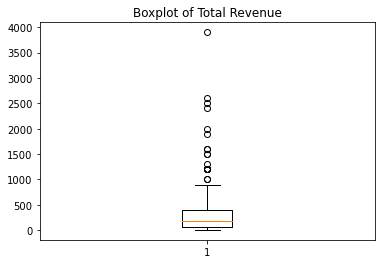

In [11]:
# checking for outliers
plt.boxplot(data['Total Revenue'].dropna())
plt.title('Boxplot of Total Revenue')
plt.show

In [12]:
""""
What This Boxplot Tells Us
The data has several outliers (the dots above the whiskers).
The distribution is right-skewed, meaning there are a few extreme values pulling the data toward higher numbers.
The majority of values are concentrated within the IQR (inside the box).
There may be a large difference between normal values and outliers, which suggests the need for further investigation
"""

'"\nWhat This Boxplot Tells Us\nThe data has several outliers (the dots above the whiskers).\nThe distribution is right-skewed, meaning there are a few extreme values pulling the data toward higher numbers.\nThe majority of values are concentrated within the IQR (inside the box).\nThere may be a large difference between normal values and outliers, which suggests the need for further investigation\n'

In [13]:
column = 'Total Revenue'


In [14]:
#compute the Q1 and Q3
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
print(Q1)
print(Q3)



62.0
399.0


In [15]:

#compute the interquartile range(IQR)
IQR = Q3 - Q1
IQR



337.0

In [16]:
#define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: -443.5, Upper Bound: 904.5


In [17]:

# Identify outliers
outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 19


In [18]:
# Remove outliers
data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
# Display the shape before and after removing outliers
print(f"Original dataset size: {data.shape[0]}")
print(f"Cleaned dataset size: {data_cleaned.shape[0]}")


Original dataset size: 240
Cleaned dataset size: 221


In [19]:

# Save the cleaned dataset
data_cleaned.to_csv("cleaned_sales_data.csv", index=False)


In [20]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999,1999,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499,499,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69,209,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15,63,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89,89,Europe,PayPal


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    int64         
 6   Total Revenue     240 non-null    int64         
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 17.0+ KB


### Exploratory Data Analysis (EDA)

In [22]:
data['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [23]:
data['Product Name'].nunique()

232

In [24]:
data['Unit Price'].describe()

count     240.000000
mean      235.600000
std       429.430963
min         6.000000
25%        29.000000
50%        89.000000
75%       249.000000
max      3899.000000
Name: Unit Price, dtype: float64

In [25]:
data['Units Sold'].unique()

array([ 2,  1,  3,  4,  5,  6, 10], dtype=int64)

In [26]:
maxprice=data['Unit Price'].mean() + data['Unit Price'].std() * 3 
maxprice

1523.8928901112886

In [27]:
data[ data['Unit Price']> maxprice]

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499,2499,North America,Credit Card
35,10036,2024-02-05,Sports,Peloton Bike,1,1895,1895,Asia,Credit Card
72,10073,2024-03-13,Electronics,HP Spectre x360 Laptop,1,1599,1599,North America,Credit Card
102,10103,2024-04-12,Electronics,Canon EOS R5 Camera,1,3899,3899,North America,Credit Card
216,10217,2024-08-04,Electronics,Apple MacBook Pro 16-inch,1,2399,2399,North America,Credit Card


In [38]:
data['Total Revenue'].sum()

80381

In [39]:
(data['Units Sold'] * data['Unit Price']).sum()

80118

In [42]:
"Sum of 'Total Revenue'  is not equal to sum of the product of 'Units Sold' and 'Unit Price'"

"Sum of 'Total Revenue'  is not equal to sum of the product of 'Units Sold' and 'Unit Price'"

In [28]:
data['Total Revenue'].describe()

count     240.000000
mean      334.920833
std       485.756751
min         6.000000
25%        62.000000
50%       179.000000
75%       399.000000
max      3899.000000
Name: Total Revenue, dtype: float64

In [29]:
data['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [30]:
data['Payment Method'].value_counts()

Credit Card    120
PayPal          80
Debit Card      40
Name: Payment Method, dtype: int64

### What marketing strategies can be found through analyzing the payment methods


The above values show that payment via credit card was the most used mode of payment.

Below are some marketing strategies:

1. Targeting Campaigns.

It is clear that Credit Cards are the most common payment method, marketing efforts can be tailored towards incentives that encourage users to make larger purchases or reward frequent Credit Card users (like, offering special discounts or cashback offers for Credit Card payments).

PayPal users might respond well to promotions emphasizing convenience or security, as PayPal is often associated with faster and safer transactions.

If Debit Cards are less popular, you could run specific campaigns aimed at encouraging debit card usage (like offering lower transaction fees or special discounts for debit card payments)


2. Behavioral Analysis

Tracking which payment method is used more often can give insights into customer behavior. For instance, if a lot of customers are using Credit Cards, it may indicate they are comfortable with higher spending or value points and rewards. PayPal may indicate an audience that values speed and security, while Debit Card users might be more budget-conscious.

Based on these insights, you could adjust your marketing tone—promoting value or convenience to match the preferences of each payment group.



In [31]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999,1999,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499,499,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69,209,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15,63,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89,89,Europe,PayPal


In [32]:
#extract month
data['month'] = data['Date'].dt.month

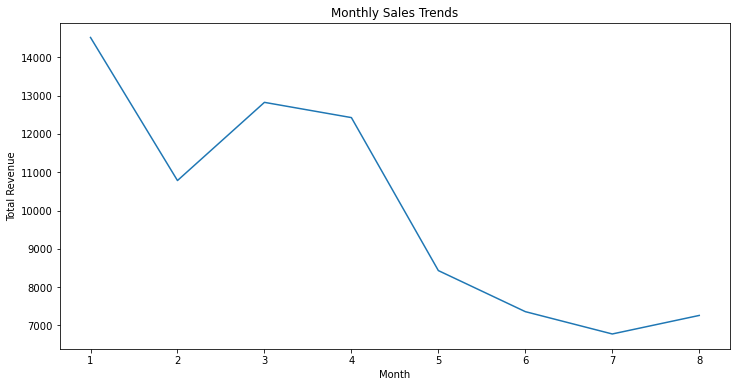

In [33]:
#line graph on monthly sales trends
monthly_sales = data.groupby('month')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['Total Revenue'])
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

### What are the peak sales seasons?


The above line graph answers my question on peak seasons which appear to be between the second and the fourth months.

The most revenue was collected in the first four months.

Factors that may have led to the trend shown above in the line graph:

1. Seasonal Products.

If it's a business selling things like winter coats or holiday decorations, the peak in month 1 might be due to holiday shopping. The smaller peak in month 
3 could be a clearance sale or a smaller holiday.

2. Subscription Service.

If it's a subscription service, the initial peak might be from a big launch or promotion, and the decline could be people not renewing.

3. External Factors.

Things like economic downturns, competitor actions, or even the weather can impact sales.

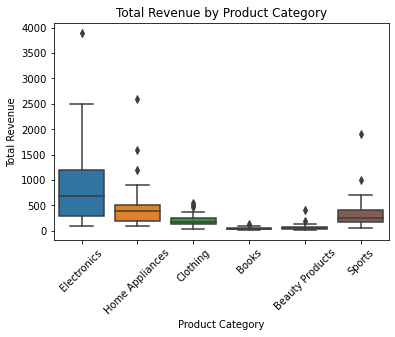

In [34]:
sns.boxplot(x='Product Category', y='Total Revenue', data=data)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

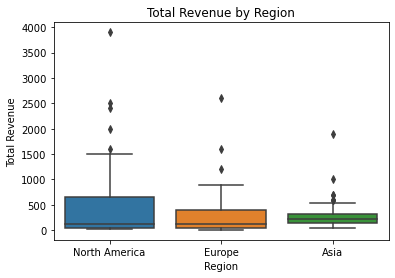

In [35]:
sns.boxplot(x='Region', y='Total Revenue', data=data)
plt.title('Total Revenue by Region')
plt.show()

### How is the region related to the total revenue and how it affects online sales?


North America is the strongest revenue generator overall, with both a higher median and higher potential for exceptionally high revenue (as shown by the outliers).

Europe demonstrates moderate and relatively consistent revenue performance.

Asia has the lowest revenue generation among the three regions, with less variability in the central data but still the possibility of higher outliers.

How does this affect online sales:

1. Customer Service.

Multilingual Support.

Provide multilingual customer support to cater to customers from different regions.   

Local Customer Service Channels.

Consider offering customer support through channels popular in specific regions, such as local social media platforms or messaging apps.

2. Optimize Marketing Spend

Allocate Budget Based on Potential.

Allocate your online marketing budget based on the revenue potential of each region. North America, for instance, might warrant a larger share of the budget given its strong performance.

Track Return On Investment(ROI)

Closely track the return on investment (ROI) of your online marketing campaigns in each region to ensure you're getting the most out of your spending.

How to improve online sales in the region:

1. Market Research.

Conduct thorough market research to understand the specific needs and preferences of online shoppers in a specific region. 
  
2,. Mobile Optimization.

Given the high mobile penetration in many Asian countries, prioritize mobile optimization of your website and checkout process. 
  
3. Payment Options.

Offer a variety of payment options popular in Asia, including mobile wallets and local payment gateways.

 

In [36]:
data.groupby(['Product Category','Region'])['Total Revenue'].sum()

Product Category  Region       
Beauty Products   Europe            2611
Books             North America     1825
Clothing          Asia              8095
Electronics       North America    34949
Home Appliances   Europe           18609
Sports            Asia             14292
Name: Total Revenue, dtype: int64

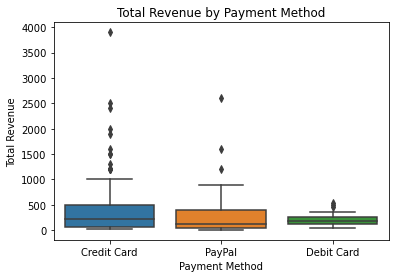

In [37]:
sns.boxplot(x='Payment Method', y='Total Revenue', data=data)
plt.title('Total Revenue by Payment Method')
plt.show()